# Sentiment Analysis Using RNN

In [1]:
import numpy as np
# to get all the punctuation in english language
from string import punctuation
from collections import Counter
import operator


### Import Data

In [2]:
# load data
with open('data/reviews.txt', 'r') as f:
    reviews = f.read()
with open('data/labels.txt', 'r') as f:
    labels = f.read()
    
# print review and lable
print(reviews[:100])
print(labels[1])
    

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life
o


### Data Pre-Processing

In [3]:
# list of punctuation from a libraray
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
reviews = reviews.lower()
# get rid of punctuation
all_text = ''.join([c for c in reviews if c not in punctuation])

In [5]:
# make all the reviews in one big string
reviews_split = all_text.split('\n')
all_text = ''.join(reviews_split)

# all the words splitted
words = all_text.split()

print("First 10 words in the data:\n\n",words[:10])
print("\nTotal Number of words in whole data:",len(words))

First 10 words in the data:

 ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the']

Total Number of words in whole data: 6020196


### Word to Numbers

In [6]:
# creates a dictionary with word and number of its instances in data
word_counter = Counter(words)
word_counter

Counter({'bromwell': 8,
         'high': 2161,
         'is': 107328,
         'a': 163009,
         'cartoon': 545,
         'comedy': 3246,
         'it': 96352,
         'ran': 238,
         'at': 23513,
         'the': 336713,
         'same': 4053,
         'time': 12724,
         'as': 46933,
         'some': 15747,
         'other': 9163,
         'programs': 66,
         'about': 17374,
         'school': 1659,
         'life': 6628,
         'such': 5134,
         'teachers': 77,
         'my': 12503,
         'years': 4517,
         'in': 93968,
         'teaching': 82,
         'profession': 65,
         'lead': 1310,
         'me': 10773,
         'to': 135720,
         'believe': 2505,
         'that': 73245,
         's': 65361,
         'satire': 261,
         'much': 9763,
         'closer': 206,
         'reality': 987,
         'than': 9919,
         'scramble': 6,
         'survive': 260,
         'financially': 29,
         'insightful': 66,
         'students': 361

In [7]:
# counter dictionary sorted according to word instances in data
sorted_vocab = sorted(word_counter.items(), key=operator.itemgetter(1), reverse=True)
sorted_vocab

[('the', 336713),
 ('and', 164107),
 ('a', 163009),
 ('of', 145864),
 ('to', 135720),
 ('is', 107328),
 ('br', 101872),
 ('it', 96352),
 ('in', 93968),
 ('i', 87623),
 ('this', 76000),
 ('that', 73245),
 ('s', 65361),
 ('was', 48208),
 ('as', 46933),
 ('for', 44343),
 ('with', 44125),
 ('movie', 44039),
 ('but', 42603),
 ('film', 40155),
 ('you', 34230),
 ('on', 34200),
 ('t', 34081),
 ('not', 30626),
 ('he', 30138),
 ('are', 29430),
 ('his', 29374),
 ('have', 27731),
 ('be', 26957),
 ('one', 26789),
 ('all', 23978),
 ('at', 23513),
 ('they', 22906),
 ('by', 22546),
 ('an', 21560),
 ('who', 21433),
 ('so', 20617),
 ('from', 20498),
 ('like', 20276),
 ('there', 18832),
 ('her', 18421),
 ('or', 18004),
 ('just', 17771),
 ('about', 17374),
 ('out', 17113),
 ('if', 16803),
 ('has', 16790),
 ('what', 16159),
 ('some', 15747),
 ('good', 15143),
 ('can', 14654),
 ('more', 14251),
 ('she', 14223),
 ('when', 14182),
 ('very', 14069),
 ('up', 13291),
 ('time', 12724),
 ('no', 12717),
 ('even', 1

In [8]:
# convert vocabulary to numbers
print("First word and instaces in data:",sorted_vocab[1][0],sorted_vocab[1][1])

# converts words to numbers, smaller number for words that appear msot
vocab_to_int = {}
for i in np.arange(0,len(sorted_vocab)):
    vocab_to_int[str(sorted_vocab[i][0])] = i+1
# another smart way    
#vocab_to_int = {word:ii+1 for ii, word in enumerate(sorted_vocab,0)}    
print("Number for word and is:",vocab_to_int["and"])

First word and instaces in data: and 164107
Number for word and is: 2


#### Encode Reviews

In [9]:
# split words in review data 
# s: list of list with each list is a reivew
reviews = reviews.lower()
split_reviews = reviews.split(" ")
# get rid of punctuation
split_reviews = ''.join([c for c in reviews if c not in punctuation])

s = []
s1 = []
for word in split_reviews:
    if word == "":
        pass
    elif word == " ":
        pass
    elif word != "\n":
        s1.append(word)
    else: 
        s1 = []
        s.append(s1)
 

In [10]:
reviews_list = s    
# convert them to numbers for use in neural networks
count  = 0
reviews_int = []

for review in reviews_list:
    reviews_int.append([vocab_to_int[word] for word in review])

# first review in int form    
reviews_int[1][:10]

[2035, 709, 143, 953, 1498, 953, 13, 13, 1802, 953]

#### Encode Labels

In [11]:
labels_list = labels.split('\n')

labels_int = []
for emotion in labels_list:
    if emotion=="negative":
        labels_int.append(0)
    elif emotion=="positive":
        labels_int.append(1)
# smart way        
#labels_int = np.array([1 if label=="positive" else 0 for label in labels_list])        
labels_int[:10]        

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

### Removing outlier

In [12]:
# outlier
review_lens = Counter([len(x) for x in reviews_int])
print("zero length review:", review_lens[0])
print("max length of review:", max(review_lens))

zero length review: 1
max length of review: 10862


In [13]:
print(len(reviews_int))
# remove zero length reviews
# indices of non zero length reviews
non_zero_idx = [ii for ii, review in enumerate(reviews_int) if len(review)!=0]
reviews_int = [reviews_int[ii] for ii in non_zero_idx]
encoded_labels = [labels_int[ii] for ii in non_zero_idx]
assert(len(reviews_int)==len(encoded_labels))
print(len(encoded_labels))

25000
24999


### Padding for Normal length of each reviews

In [14]:
# transforms reviewss to have same length
def pad_features(reviews_int, seq_length):
    temp_reviews = np.zeros((len(reviews_int), seq_length))
    
    for i,row in enumerate(reviews_int):
        temp_reviews[i, -len(row):] = np.array(row)[:seq_length]
    return temp_reviews    

In [15]:
features = pad_features(reviews_int, 200)


### Train, Validation and Test Split

In [16]:
split_frac = 0.7

split_idx = int(len(features)*split_frac)

train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = np.array(labels_int[:split_idx]), labels_int[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x = remaining_x[:test_idx]
val_y = np.array(remaining_y[:test_idx])

test_x = remaining_x[test_idx:]
# -1 as it was throwing an error
test_y = np.array(remaining_y[test_idx:])[:-1]

print(len(features), len(encoded_labels))
print(test_x.shape, test_y.shape)

24999 24999
(3750, 200) (3750,)


### Dataloaders

In [17]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 10
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
val_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

train_loader = DataLoader(train_data, shuffle=True, batch_size= batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size= batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size= batch_size)


In [18]:
dataiter = iter(train_loader)
x,y = dataiter.next()

In [19]:
print(x,y)

tensor([[   0.,    0.,    0.,  ...,   10., 1802., 1291.],
        [  10., 1311.,  709.,  ...,  953.,   23.,   23.],
        [  10., 1348.,  953.,  ..., 1348., 4629., 1498.],
        ...,
        [   3.,   13., 1013.,  ...,  953.,   13., 1013.],
        [  13.,    3.,  222.,  ..., 1802.,  222.,  222.],
        [  10., 2226.,    3.,  ...,  511.,  953., 2035.]],
       dtype=torch.float64) tensor([1, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=torch.int32)


### Network

In [20]:
import torch.nn as nn
class SentimentRNN(nn.Module):
    
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentRNN, self).__init__()
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
    
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        # stack up lstm output
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        sig_out = self.sig(out)
        
        sig_out = sig_out.view(batch_size,-1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden
        

In [21]:
import torch
train_on_gpu = torch.cuda.is_available()

In [22]:
vocab_size = len(vocab_to_int)+1
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size,embedding_dim,hidden_dim, n_layers)
print(net)

SentimentRNN(
  (embedding): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [23]:
lr = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

### Training and Validation

In [24]:
epochs = 1
counter = 0 
clip = 5
print_every = 1


if train_on_gpu:
    net.cuda()
    
net.train()

for e in range(epochs):
    h = net.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        counter +=1
        
        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()
        h = tuple([each.data for each in h])
        
        net.zero_grad()
        inputs  = inputs.type(torch.LongTensor)
        labels = labels.type(torch.DoubleTensor)
        output, h = net(inputs, h)
        
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        
        nn.utils.clip_grad_norm(net.parameters(), clip)
        optimizer.step()
        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in val_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()
                inputs  = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
        
        

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Epoch: 1/1... Step: 1... Loss: 0.687158... Val Loss: 0.693577
Epoch: 1/1... Step: 2... Loss: 0.712214... Val Loss: 0.693380
Epoch: 1/1... Step: 3... Loss: 0.677846... Val Loss: 0.693822
Epoch: 1/1... Step: 4... Loss: 0.686951... Val Loss: 0.694472
Epoch: 1/1... Step: 5... Loss: 0.680617... Val Loss: 0.695106


KeyboardInterrupt: 

In [25]:
test_losses = []
num_correct = 0

h = net.init_hidden(batch_size)

net.eval()

for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
    if train_on_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    inputs  = inputs.type(torch.LongTensor)
    output, h = net(inputs,h)
        # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.695
Test accuracy: 0.509


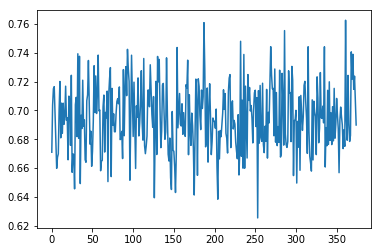

In [26]:
from matplotlib import pyplot as plt
plt.plot(test_losses)
plt.show()

In [37]:
def predict(net, test_review, sequence_length=200):
    net.eval()
    test_review = test_review.lower()
    test_review = ''.join([c for c in test_review if c not in punctuation])
    test_review = test_review.split(" ")
    test_review = [c for c in test_review if c not in punctuation]
    print(test_review)
    inputs = [vocab_to_int[word] for word in test_review]

    inputs = pad_features([inputs], sequence_length)
    inputs = torch.from_numpy(inputs)
    inputs = inputs.type('torch.LongTensor')
    h = net.init_hidden(1)
    h = tuple([each.data for each in h])
    output, h = net(inputs,h)
    return output

In [41]:
review = "hate hate hate"
predict(net,review, sequence_length=200)

['hate', 'hate', 'hate']


tensor([0.5095], grad_fn=<SelectBackward>)